['Blue' 'Blue']
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

        Blue       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



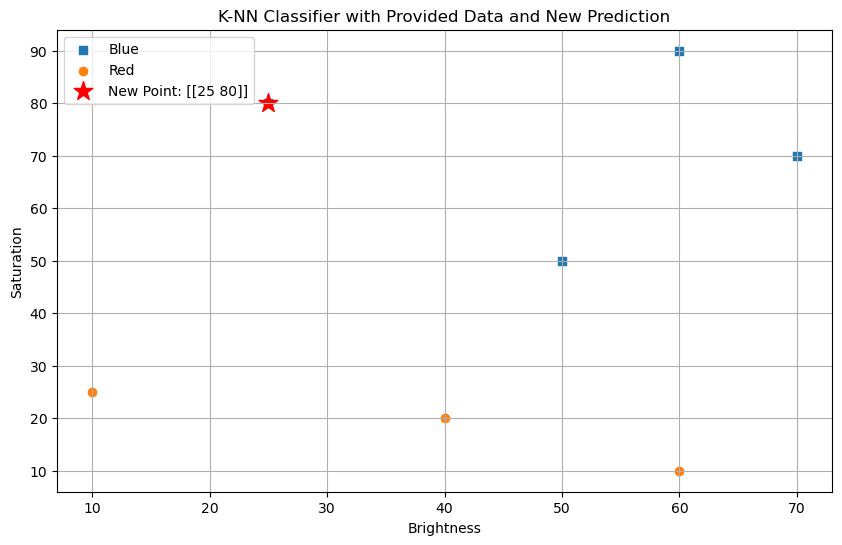

New Data Point: [[25 80]] -> Predicted Label: Blue


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Provided dataset
data = np.array([
    [40, 20, 'Red'],
    [50, 50, 'Blue'],
    [60, 90, 'Blue'],
    [10, 25, 'Red'],
    [70, 70, 'Blue'],
    [60, 10, 'Red'],
    [25, 80, 'Blue'],
])

# Splitting features and labels
X = data[:, :-1].astype(float)
y = data[:, -1]

# Split the dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47)

# Create a K-NN classifier with a specified number of neighbors (k)
k = 2
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Train the classifier on the training data
knn_classifier.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = knn_classifier.predict(X_test)

print(y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generate and display the classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

# Visualize the data points on a graph
plt.figure(figsize=(10, 6))
markers = {'Red': 'o', 'Blue': 's'}
for label in set(y):
    indices = np.where(y == label)
    plt.scatter(X[indices, 0], X[indices, 1], label=label, marker=markers[label])

# New data point for prediction
new_data_point = np.array([[25, 80]])  # Adjust the values as needed

# Predict the label for the new data point
predicted_label = knn_classifier.predict(new_data_point)

# Set plot labels and legend
plt.xlabel('Brightness')
plt.ylabel('Saturation')

# Add a custom legend entry for the new data point
plt.scatter(new_data_point[:, 0], new_data_point[:, 1], marker='*', s=200, c='red', label=f'New Point: {new_data_point}')

plt.legend()
plt.title('K-NN Classifier with Provided Data and New Prediction')
plt.grid(True)
plt.show()

# Display the predicted label for the new data point
print(f"New Data Point: {new_data_point} -> Predicted Label: {predicted_label[0]}")
